# Data Wrangling and Data Visualization


### For the analysis I'll use the Titanic data set 

In [48]:
# Libraries that used
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

In [3]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
df.shape
# this dataset has 889 records and 14 varibles 

(889, 14)

### Checking if there are any missing values are present.

In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### since deck have large number of missing values deck variable was removed

In [5]:
df.drop("deck",axis=1,inplace=True)

### Age has 177 missing values and they are replaced with mean age

In [6]:
df["age"].fillna(df["age"].mean(),inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


### Removing the missing value rows

In [7]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

###  Looking and removing duplicates

In [16]:
df.duplicated().sum()
# there are 111 

111

In [17]:
# since there are 111 duplicates they are removed
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(778, 14)

### Looking for outliers

In [21]:
# to check outliers subset of numerical variables were selected
df_num=df[["age","sibsp","parch","fare"]]
df_num.head()

,age,sibsp,parch,fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


In [22]:
# Boxplot is a good graphical method to get an idea about outliers

### Boxplot to detect outliers

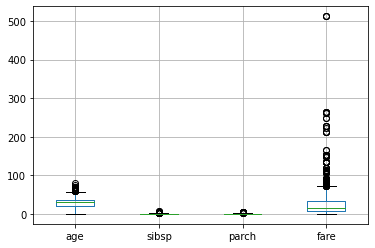

In [23]:
df_num.boxplot()
plt.show()

###  Detecting rows with outliers using 1.5 IQR rule

In [24]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR

age      14.7500
sibsp     1.0000
parch     1.0000
fare     25.8406
dtype: float64

In [25]:
out_rows=((df_num < (Q1 - 1.5 * IQR)) |(df_num > (Q3 + 1.5 * IQR))).any(axis=1) 
out_rows.sum()

172

In [26]:
# There are 172 outliers.

### Removing outliers

In [27]:
df_new=df[~out_rows]
df_new.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


### When you look at the dataset there are similar variables, if there are similar variables presented multicollinearity is present. therefore we have to remove them.

### First we have to confirm those variables are actually same or not, therfore the following method is used

In [33]:
# checking whether variable survived and alive are same or not
df_new["survived"].value_counts()

0    370
1    236
Name: survived, dtype: int64

In [34]:
df_new["alive"].value_counts()

no     370
yes    236
Name: alive, dtype: int64

In [35]:
# They have the identical value counts, but thats not enough to identify them as same variables. 
#To determind that we can use the indexes.   

In [36]:
list(df_new[df_new["survived"]==0].index)==list(df_new[df_new["alive"]=="no"].index)

True

In [38]:
# alive and survived variables are same 
# let's check pclass and class variables

In [39]:
df_new["pclass"].value_counts()

3    351
2    151
1    104
Name: pclass, dtype: int64

In [40]:
df_new["class"].value_counts()

Third     351
Second    151
First     104
Name: class, dtype: int64

In [41]:
# For both variables value counts are same, therefore indexes are used to determine that

In [42]:
list(df_new[df_new["pclass"]==1].index)==list(df_new[df_new["class"]=="First"].index)

True

In [43]:
list(df_new[df_new["pclass"]==2].index)==list(df_new[df_new["class"]=="Second"].index)

True

In [44]:
# Both variables are same

### Dropping same variables 

In [45]:
df_new.drop(["pclass","survived"],axis=1,inplace=True)
df_new

D:\Python_Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...
883,male,28.000000,0,0,10.5000,S,Second,man,True,Southampton,no,True
887,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


## Resetting the indexes

In [46]:
df_new.index=range(len(df_new))
df_new.head()

,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


## Statistical summary for the data

In [47]:
df_new.describe(include="all")

,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
count,606,606.000000,606.000000,606.000000,606.000000,606,606,606,606,606,606,606
unique,2,NaN,NaN,NaN,NaN,3,3,3,2,3,2,2
top,male,NaN,NaN,NaN,NaN,S,Third,man,True,Southampton,no,True
freq,403,NaN,NaN,NaN,NaN,455,351,384,384,455,370,391
mean,NaN,28.762902,0.303630,0.250825,18.287060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,11.296289,0.524021,0.557258,14.407729,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,22.000000,0.000000,0.000000,7.895800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,29.699118,0.000000,0.000000,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,34.000000,1.000000,0.000000,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Pandas profiling 

In [56]:
prof = pandas_profiling.ProfileReport(df_new)

In [57]:
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##  Checking the distributions of all numerical variables

<ipython-input-58-67484217822e>:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


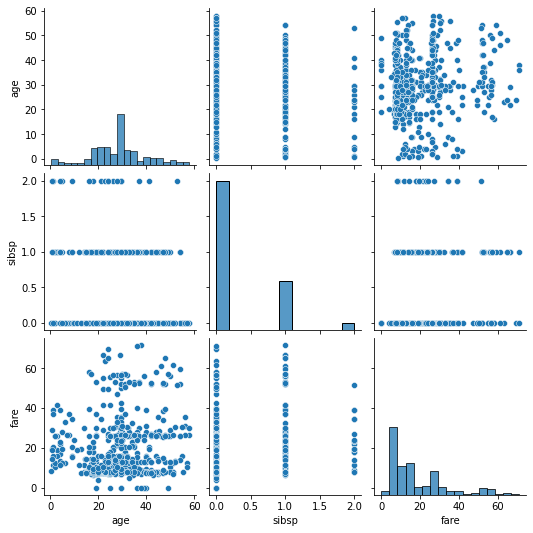

In [58]:
sns.pairplot(df_new[["age","sibsp","fare"]])
plt.show()

## Checking the correlation among all the numerical variables

In [59]:
df_new[["age","sibsp","fare"]].corr()

,age,sibsp,fare
age,1.000000,-0.141567,0.146268
sibsp,-0.141567,1.000000,0.312868
fare,0.146268,0.312868,1.000000


<ipython-input-60-f96bf8833f4d>:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


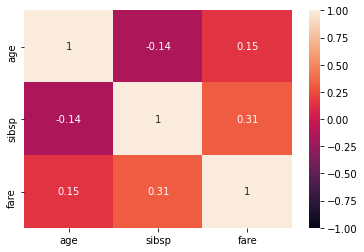

In [60]:
sns.heatmap(df_new[["age","sibsp","fare"]].corr(),annot=True,vmin=-1,vmax=1)
plt.show()

## Checking the Age with Death status

<ipython-input-61-e15a767e2f8c>:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


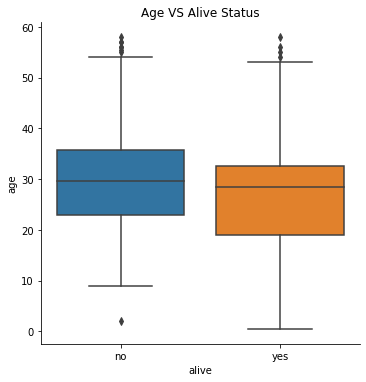

In [61]:
sns.catplot(data=df_new,x="alive",y="age",kind="box")
plt.title("Age VS Alive Status")
plt.show()

## Checking the Gender with Death status

<ipython-input-62-9caf8a9ffd2b>:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


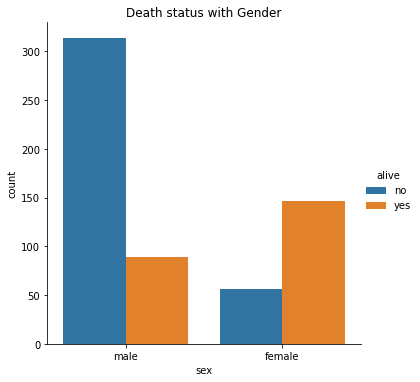

In [62]:
sns.catplot(x="sex", kind="count", hue="alive", data=df_new)
plt.title("Death status with Gender")
plt.show()

In [63]:
# In here we can see male has the highest death count

## Scatterplot with Age and Fare 

<ipython-input-64-5963367c73c2>:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


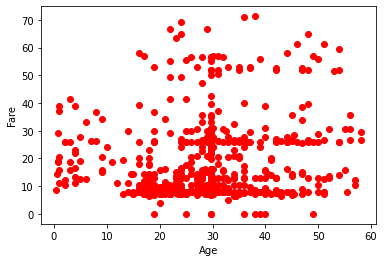

In [64]:
plt.scatter(df_new["age"],df_new["fare"], c="r")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

## Pie chart for Class

In [66]:
df1=df_new["class"].value_counts().to_frame().reset_index()
df1.columns=["class","count"]
df1

,class,count
0,Third,351
1,Second,151
2,First,104


In [65]:
df_new["class"]

0       Third
1       First
2       Third
3       First
4       Third
        ...  
601    Second
602     First
603     Third
604     First
605     Third
Name: class, Length: 606, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

<ipython-input-67-b146429c244f>:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


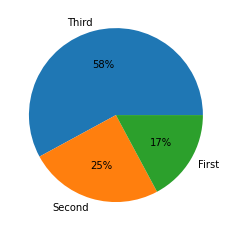

In [67]:
plt.pie(df1["count"], labels=df1["class"], autopct="%1.0f%%")
plt.show()

In [68]:
# this indicate the majority was from Third class

## Histogram to see age 

<ipython-input-70-c8363e15efab>:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


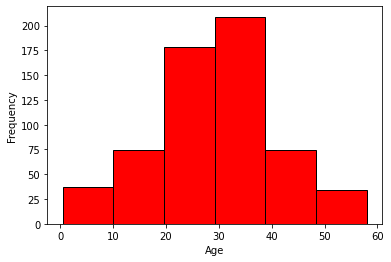

In [70]:
plt.hist(df_new["age"],6, edgecolor="black",color="red")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [71]:
# approximately 30-40 age group has the highest count

In [ ]:
'''
In this titanic data set deck variable was removed due to many missing values. 
Missing Age variable was filled with mean value.
pclass and survived variables were removed because of same variables.
removed duplicates and outliers.
Using pandas profiling we can easily do exploratory analysis.
'''

# Summary

In [ ]:
'''
In Titanic dataset we can see there's a weak correaltion among Fare and Age variable. 
Also Fare and sibsp has a weak correaltion.
Death status with Gender indicated that ther was a higher number of deaths among male.
In the pie chart it indicates that most of the passengers were from third class(58%) while second class(25%) and first class(17%) were lower than third class
Looking at histogram it is clear age has a normal distribution. Most of the passengers were middle aged.
'''
